In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kpopgroups.csv')
df['Debut'] = df['Debut'].apply(lambda x: datetime.strptime(str(x), '%d/%m/%Y') if str(x) != 'nan' else 'nan')
df = df[df['Debut'] != 'nan']
print(len(df))
df.head()

424


,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2018-05-02 00:00:00,Cube,5,6,NaN,Yes
1,100%,NaN,백퍼센트,Male,2012-09-18 00:00:00,TOP Media,4,7,Perfection,Yes
2,14U,NaN,원포유,Male,2017-04-17 00:00:00,BG,14,14,NaN,No
3,15&,NaN,피프틴앤드,Female,2012-10-05 00:00:00,JYP,2,2,NaN,No
4,1TEAM,NaN,원팀,Male,2019-03-27 00:00:00,LiveWorks,5,5,NaN,No


In [3]:
df_2024 = pd.read_csv('kpopgroups2024.csv')
df_2024['Debut'] = df_2024['Debut'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
print(len(df_2024))
df_2024.head()

33


,Debut,Name,Members,Gender
0,2024-01-30,A SIX,6,Mixed
1,2024-01-10,ALL(H)OURS,7,Male
2,2024-04-17,Anode,2,Male
3,2024-01-15,Aria,5,Female
4,2024-04-01,BABYMONSTER,7,Female


In [4]:
df = pd.concat([df,df_2024]).reset_index(drop=True)
print(len(df))
df.head()

457


,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2018-05-02 00:00:00,Cube,5,6.0,NaN,Yes
1,100%,NaN,백퍼센트,Male,2012-09-18 00:00:00,TOP Media,4,7.0,Perfection,Yes
2,14U,NaN,원포유,Male,2017-04-17 00:00:00,BG,14,14.0,NaN,No
3,15&,NaN,피프틴앤드,Female,2012-10-05 00:00:00,JYP,2,2.0,NaN,No
4,1TEAM,NaN,원팀,Male,2019-03-27 00:00:00,LiveWorks,5,5.0,NaN,No


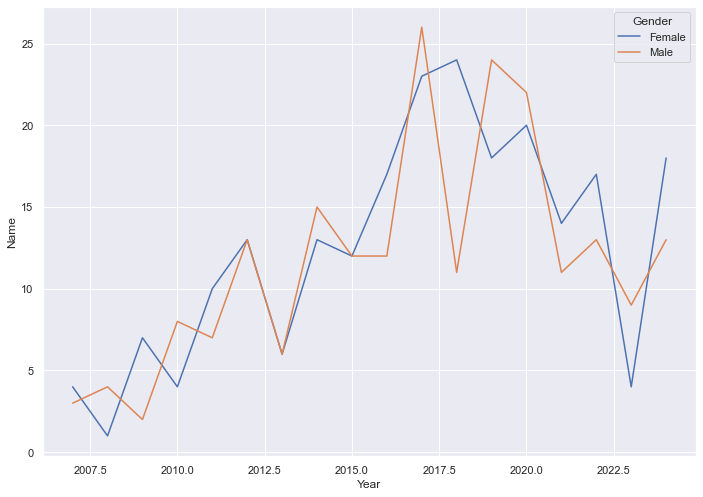

In [25]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
df['Year'] = df['Debut'].apply(lambda x: int(x.year))
grp = df.groupby(by=['Year','Gender'])['Name'].count().reset_index()
ax = sns.lineplot(data=grp[(grp['Year'] > 2006) & (grp['Gender'] != 'Mixed')], x='Year', y='Name', hue='Gender')
plt.show()

In [6]:
res_df = df[['Debut','Members']]
res_df['Debut'] = res_df['Debut'].apply(lambda x: x.year)
print(len(res_df))
res_df.head()

457


C:\Users\HP\AppData\Local\Temp\ipykernel_32836\3749955990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['Debut'] = res_df['Debut'].apply(lambda x: x.year)


,Debut,Members
0,2018,5
1,2012,4
2,2017,14
3,2012,2
4,2019,5


In [7]:
grp = res_df.groupby(by='Debut')['Members'].count().to_frame().reset_index()
grp = grp[['Debut','Members']].set_index('Debut').to_dict()
res_df['count'] = 0
res_df = res_df.groupby(['Debut','Members'])['count'].count().reset_index()
for i in res_df.index:
    res_df.loc[i,'groups_in_year'] = grp['Members'][res_df.loc[i,'Debut']]
res_df['Members_Norm'] = res_df['count'] / res_df['groups_in_year']
res_df.tail()

C:\Users\HP\AppData\Local\Temp\ipykernel_32836\2255781287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['count'] = 0


,Debut,Members,count,groups_in_year,Members_Norm
143,2024,5,10,33.0,0.303030
144,2024,6,7,33.0,0.212121
145,2024,7,3,33.0,0.090909
146,2024,8,1,33.0,0.030303
147,2024,11,1,33.0,0.030303


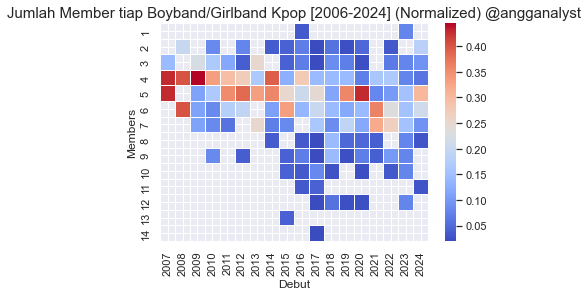

In [8]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(res_df[(res_df['Debut'] > 2006) & (res_df['Members'] < 23)][['Debut','Members','Members_Norm']].pivot_table(index='Members',columns='Debut',values='Members_Norm'), cmap='coolwarm', linewidths=0.5)
ax.set_title('Jumlah Member tiap Boyband/Girlband Kpop [2006-2024] (Normalized) @angganalyst',fontsize=15)
plt.show()